In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('Mall_Customers.csv')

In [69]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
df = df.drop('CustomerID', axis=1)

In [71]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [73]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

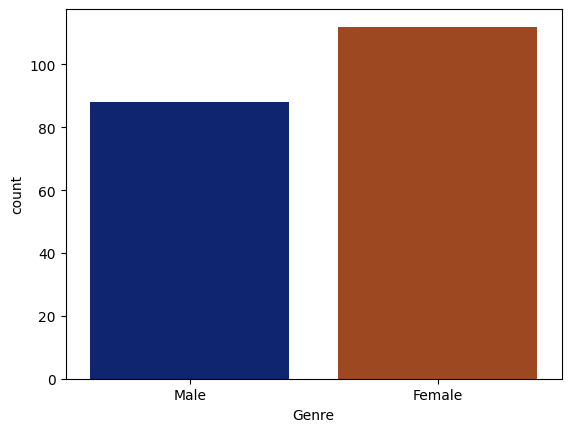

In [74]:
sns.countplot(df, x='Genre', hue='Genre', palette='dark')

In [75]:
df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1}).astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_6520\597765675.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1}).astype(int)


In [76]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()

X = sc.fit_transform(df)

# Elbow method

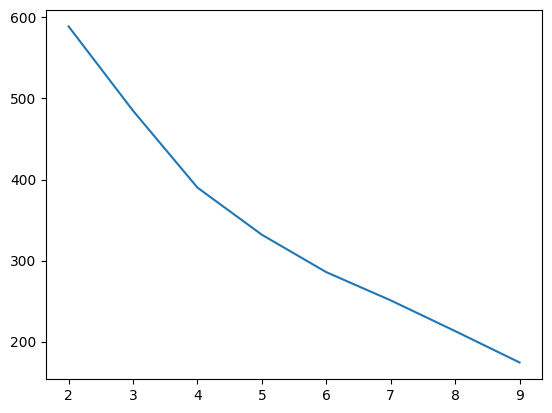

In [78]:
from sklearn.cluster import KMeans

ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)

    ssd.append(model.inertia_)

plt.plot(range(2, 10), ssd)

In [79]:
model = KMeans(n_clusters=5)
lables = model.fit_predict(X)

<Axes: >

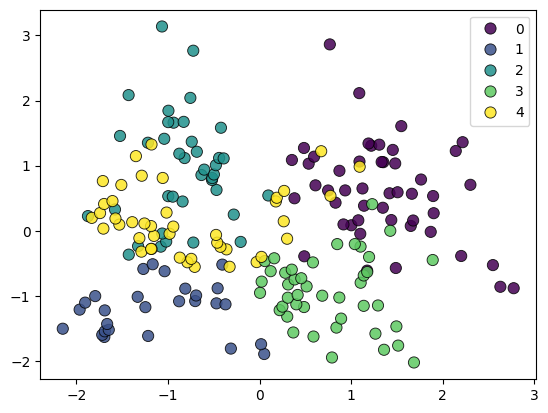

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=lables, palette='viridis', s=65, edgecolor='black', alpha=0.85)